In [1]:
%matplotlib notebook

In [2]:
#!pip install cvxpy
#!pip install control  

In [3]:
import numpy as np
import cvxpy as cp
import control
from scipy import sparse
import matplotlib.pyplot as plt
from math import sin, cos
import matplotlib.animation as animation

___________________________________________________________________________________________________________________________

In [4]:
###Define the parameters###

##YOUR CODE IS HERE##

# Cart mass
# Pendulum mass
# Coefficient of friction for cart
# Mass moment of inertia of the pendulum
# Gravity
# Length to pendulum center of mass
# Time step


#To construct a state-space system from
#A matrice
#B matrice
#C matrice
#D matrice

__________________________________________________________________________________________________________________________

In [6]:
#Construct a state-space system

#use control.StateSpace

In [7]:
##YOUR CODE IS HERE##

In [8]:
sys

StateSpace(array([[ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        , -0.18181818,  2.67272727,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        , -0.45454545, 31.18181818,  0.        ]]), array([[0.        ],
       [1.81818182],
       [0.        ],
       [4.54545455]]), array([[1., 0., 0., 0.],
       [0., 0., 1., 0.]]), array([[0.],
       [0.]]))

In [9]:
#Discretization of the state-space system

#use control.c2d  
#with zero-order hold (ZOH) method

In [10]:
##YOUR CODE IS HERE##

In [ ]:
A_zoh = np.array(sys_discrete.A)
B_zoh = np.array(sys_discrete.B)

In [11]:
sys_discrete, A_zoh, B_zoh

(StateSpace(array([[ 1.00000000e+00,  9.90913158e-02,  1.36323517e-02,
          4.50408275e-04],
        [ 0.00000000e+00,  9.81778666e-01,  2.78888611e-01,
          1.36323517e-02],
        [ 0.00000000e+00, -2.31842716e-03,  1.15979478e+00,
          1.05273450e-01],
        [ 0.00000000e+00, -4.74300359e-02,  3.27642105e+00,
          1.15979478e+00]]), array([[0.00908684],
        [0.18221334],
        [0.02318427],
        [0.47430036]]), array([[1., 0., 0., 0.],
        [0., 0., 1., 0.]]), array([[0.],
        [0.]]), 0.1),
 array([[ 1.00000000e+00,  9.90913158e-02,  1.36323517e-02,
          4.50408275e-04],
        [ 0.00000000e+00,  9.81778666e-01,  2.78888611e-01,
          1.36323517e-02],
        [ 0.00000000e+00, -2.31842716e-03,  1.15979478e+00,
          1.05273450e-01],
        [ 0.00000000e+00, -4.74300359e-02,  3.27642105e+00,
          1.15979478e+00]]),
 array([[0.00908684],
        [0.18221334],
        [0.02318427],
        [0.47430036]]))

______________________________________________________________________________________________________________________________

In [30]:
##Initialization of MPC##

In [32]:
[nx, nu] = B_zoh.shape

Q = sparse.diags([10., 5., 100., 5.])
R = np.array([[.1]])

x0 = np.array([-1.5, -1., 0.65, 0.5])  # Initial conditions
xr = np.array([0., 0., 0., 0.])  # Desired states
xr *= -1

N = 10  # MPC Horizon length

x = cp.Variable((nx, N+1))
u = cp.Variable((nu, N))
x_init = cp.Parameter(nx)

nsim = 70  # Number of simulation timesteps
time = [0.]
cart_pos = [x0[0]]
cart_vel = [x0[1]]
pend_ang = [x0[2]]
pend_ang_vel = [x0[3]]
ctrl_effort = [u[:, 0].value]


_____________________________________________________________________________________________________________________________

In [34]:
##Define the MPC##
#Choose the corect line for each part of MPC

In [27]:
test = cp.quad_form(x[:, N] - xr, Q)                                #A
test = 0.                                                           #B
test = [cp.norm(u[:, t], 'inf') <= 10.]                             #C
test = [[x[:, 0] == x_init]]                                        #D
test = cp.quad_form(xr - x[:, t], Q) + cp.quad_form(u[:, t], R)     #E
test = [x[:, t + 1] == A_zoh @ x[:, t] + B_zoh @ u[:, t]]           #F

Expression(CONVEX, NONNEGATIVE, ())

In [13]:
def run_mpc():
    cost = #Test Value 1
    constr = #Test Value 2
    for t in range(N):
        cost += #Test Value 3
        constr += #Test Value 4
        constr += #Test Value 5

    cost += #Test Value 6
    problem = cp.Problem(cp.Minimize(cost), constr)
    return problem

Initial condition for MPC

$x(0) == x_{init}$

Prediction in MPC loop

$ x_{t+1} == A_{discrete} * x(t) + B_{discrete} * u(t)$

_________________________________________________________________________________________________________________________

In [14]:
##RUN THE MPC##

In [33]:
for i in range(1, nsim+1):
    prob = run_mpc()
    x_init.value = x0
    print('TIME: ', round(i*dt, 2), 'STATES: ', [round(state, 2) for state in x0])
    prob.solve(solver=cp.OSQP, warm_start=True)
    ##YOUR CODE IS HERE##
    time.append(i)
    cart_pos.append(x0[0])
    cart_vel.append(x0[1])
    pend_ang.append(x0[2])
    pend_ang_vel.append(x0[3])
    ctrl_effort.append(u[:, 0].value)

TIME:  0.1 STATES:  [-1.5, -1.0, 0.65, 0.5]
TIME:  0.2 STATES:  [-1.68, -2.62, 0.58, -1.99]
TIME:  0.3 STATES:  [-2.02, -4.25, 0.23, -5.02]
TIME:  0.4 STATES:  [-2.41, -3.43, -0.15, -2.91]
TIME:  0.5 STATES:  [-2.71, -2.55, -0.36, -1.37]
TIME:  0.6 STATES:  [-2.92, -1.77, -0.45, -0.43]
TIME:  0.7 STATES:  [-3.07, -1.11, -0.46, 0.11]
TIME:  0.8 STATES:  [-3.15, -0.55, -0.44, 0.4]
TIME:  0.9 STATES:  [-3.18, -0.09, -0.39, 0.53]
TIME:  1.0 STATES:  [-3.17, 0.29, -0.34, 0.57]
TIME:  1.1 STATES:  [-3.13, 0.59, -0.28, 0.56]
TIME:  1.2 STATES:  [-3.06, 0.83, -0.23, 0.52]
TIME:  1.3 STATES:  [-2.96, 1.01, -0.18, 0.47]
TIME:  1.4 STATES:  [-2.86, 1.15, -0.14, 0.41]
TIME:  1.5 STATES:  [-2.74, 1.24, -0.1, 0.36]
TIME:  1.6 STATES:  [-2.61, 1.3, -0.07, 0.3]
TIME:  1.7 STATES:  [-2.48, 1.34, -0.04, 0.25]
TIME:  1.8 STATES:  [-2.34, 1.35, -0.02, 0.21]
TIME:  1.9 STATES:  [-2.21, 1.35, -0.0, 0.17]
TIME:  2.0 STATES:  [-2.07, 1.33, 0.01, 0.14]
TIME:  2.1 STATES:  [-1.94, 1.29, 0.03, 0.11]
TIME:  2.2 S

$ x_{0} = A_{discrete} * x(t) + B_{discrete} * u(t)$

<IPython.core.display.Javascript object>


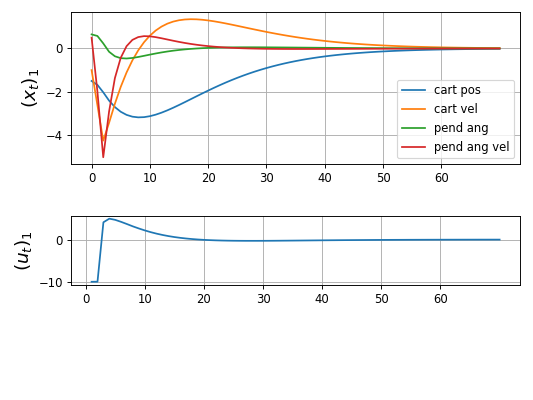

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


In [16]:
def plot_results():
    f = plt.figure()
    ax = f.add_subplot(211)
    plt.plot(cart_pos, label='cart pos')
    plt.plot(cart_vel, label='cart vel')
    plt.plot(pend_ang, label='pend ang')
    plt.plot(pend_ang_vel, label='pend ang vel')
    plt.ylabel(r"$(x_t)_1$", fontsize=16)
    plt.xticks([t_step for t_step in range(nsim) if t_step % 10 == 0])
    plt.legend()
    plt.grid()

    plt.subplot(4, 1, 3)
    plt.plot(ctrl_effort)
    plt.ylabel(r"$(u_t)_1$", fontsize=16)
    plt.xticks([t_step for t_step in range(nsim) if t_step % 10 == 0])
    plt.grid()

    plt.tight_layout()
    plt.show()
    
    
    
plot_results()



<IPython.core.display.Javascript object>


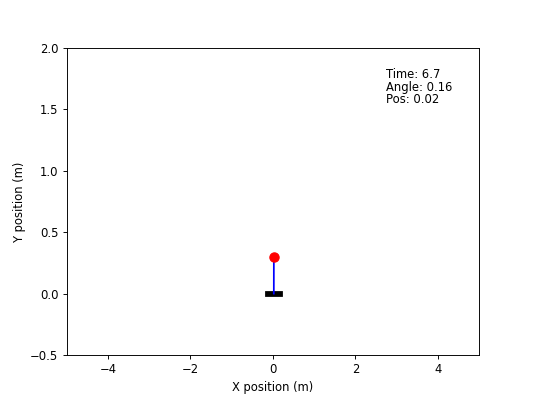

AttributeError: module 'matplotlib.animation' has no attribute 'save'

In [17]:
def animated_plot():
    fig = plt.figure()
    ax = plt.axes(xlim=(-5., 5.), ylim=(-.5, 2.))
    time_text = ax.text(2.75, 1.75, '')
    angle_text = ax.text(2.75, 1.65, '')
    pos_text = ax.text(2.75, 1.55, '')
    times = range(nsim)

    def update(i):
        time_text.set_text("Time: {0:0}".format(round(times[i]*dt, 2)))
        angle_text.set_text("Angle: {0:0.2f}".format(pend_ang[i]*57.3))
        pos_text.set_text("Pos: {0:0.2f}".format(-cart_pos[i]))

        cart_x = -cart_pos[i]
        pend_pos = pend_ang[i]
        pendulum_x0 = cart_x
        pendulum_y0 = 0.
        pendulum_x1 = cart_x + l*sin(pend_pos)
        pendulum_y1 = l*cos(pend_pos)

        cart.set_data([cart_x-.15, cart_x+.15], 0.)
        pend.set_data([pendulum_x0, pendulum_x1], [pendulum_y0, pendulum_y1])
        ball.set_data(pendulum_x1, pendulum_y1)
        return (cart,) + (pend,) + (ball,)

    cart, = plt.plot([], [], 'black', linewidth=5.)
    pend, = plt.plot([], [], 'b-')
    ball, = plt.plot([], [], 'ro', markersize=8.)
    plt.xlabel('X position (m)')
    plt.ylabel('Y position (m)')
    line_ani = animation.FuncAnimation(fig, update, int(nsim), interval=100, repeat=True)
    animation.save('1.gif')
    plt.show()

animated_plot()